# Constructing a Taylor Polynomial with Numerical Derivatives

The purpose of this project is to construct a Taylor Polynomial in order to extrapolate values within a neighborbood of values when a function is not initially avaiable. In order to accomplish this, finite difference methods are used to approximate the derivatives up to the second order. 

## Import Data: Test Case 

For this example, we will construct random values.

In [241]:
%matplotlib inline
%reload_ext gnuplot_kernel

import random as rand
import matplotlib.pyplot as plt
import numpy as np

zero = []
indep_var = []
poly = []
dydx = []
second_order_dydx = []
increment = 1
center = 4
x = 3.86 # Extrapolation Value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
 [7, 3, 2, 2, 4, 5, 1, 8, 3, 2]


Text(0.5, 1.0, 'Test Values')

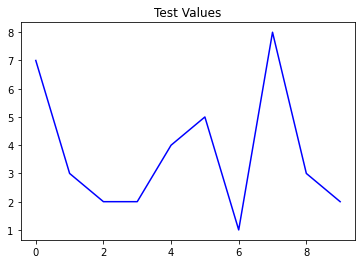

In [242]:
for i in range(10):
    zero.append(0)
    indep_var.append(i)
    poly.append(rand.randrange(10))
    
print(indep_var, "\n", poly)

plt.plot(indep_var,poly, 'b')
plt.title('Test Values')

# Constructing First Order Numerical Derivative

Now we can construct the first derivative using the Finite Difference Method. Observe that $h$ is the step size of the derivateve, and due to the property that $\Delta x = dx$ as $\lim_{x \to 0}$, the behavior of the limit can is represented as the step size $h$. 

For the endpoints, using the three point difference method will provide a more accurate method.

[-5.5, -1.5, -1.0, 1.1666666666666667, 2.0833333333333335, -2.5, 2.0833333333333335, 1.5833333333333333, -11.0, 1.0]


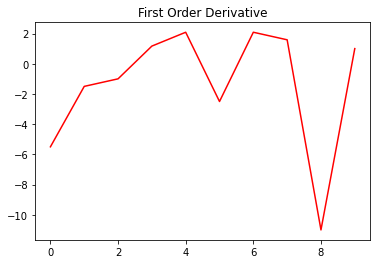

In [243]:
for i in range(10):    
    if(0 <= i <= 2):
        dydx.append((-3*poly[i] + 4*poly[i + 1] - poly[i + 2*1]) / 2 * 1)
#         dydx.append((poly[i + 1] - poly[i]) / 1)       
    elif(i > 7):
        dydx.append((-3*poly[i] + 4*poly[i - 1] - poly[i - 2*1]) / (2 * -1))

#         dydx.append((poly[i] - poly[i - 1]) / 1)
    elif(i > 2 and i <= 7):
        dydx.append((8*poly[i + 1] - poly[i + 2] + poly[i - 2] - 8*poly[i -1]) / 12 * 1)
        
plt.plot(indep_var, dydx, 'r')
plt.title('First Order Derivative')
print(dydx)

It is important to note that due to truncation the Taylor Expansion, the three point difference is not accurate enough to approximate the dirvatives at the end points on each side. Since the step size $h = 1 ,$ using more points to approximate the derivatives towards the center of the interval are more accurate.    

# Consrtuct Second Order Numerical Derivative

It is important to note that after the first derivative, the computation of constructing higher order derivatives become complex with central difference method. Furthermore, using central difference assumes that the function is differenciable to the third order.

So, we will be using forward and backwards methods which asymptotically behaves to the function to an error of $O(n)$.

[5.0, 0.0, 5.0, 3.0, 3.0, -4.0, -9.0, 27.0, -35.0, 20.0]


Text(0.5, 1.0, 'Second Order Derivative')

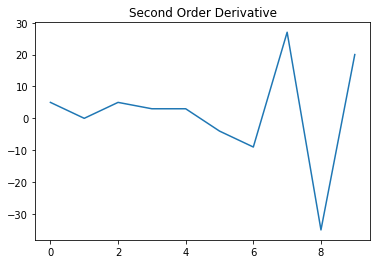

In [244]:
for i in range(10):    
    if(0 <= i <= 3):
        second_order_dydx.append((2*poly[i] - 5*poly[i + 1] + 4*poly[i+2] - poly[i+3]) / 1**2)    
    else:
        second_order_dydx.append((2*poly[i] - 5*poly[i - 1] + 4*poly[i-2] - poly[i-3]) / 1**2)

print(second_order_dydx)
plt.plot(indep_var, second_order_dydx)
plt.title('Second Order Derivative')

# Visualization

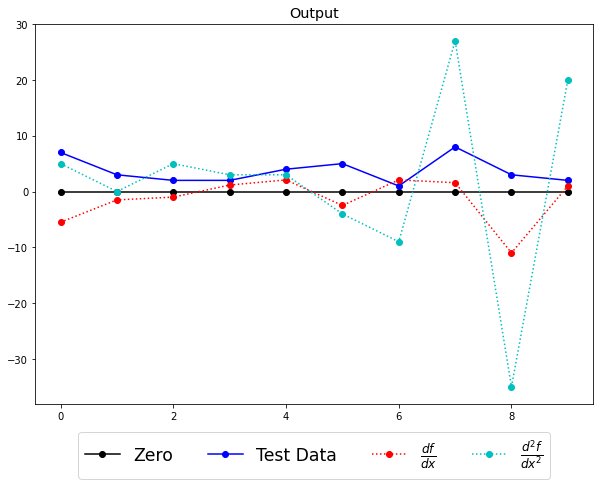

In [245]:
plt.figure(figsize = (10,7))
plt.plot(indep_var, zero, 'k', marker = 'o', label = 'Zero')
plt.plot(indep_var, poly, 'b', marker = 'o', label = 'Test Data')
plt.plot(indep_var, dydx, 'r', linestyle = ':', marker = 'o', label = r'$\frac{df}{dx}$')
plt.plot(indep_var, second_order_dydx, 'c', linestyle = ':', marker = 'o', label = r'$\frac{d^2f}{dx^2}$')
plt.title('Output', fontsize = 'x-large')
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 5,fontsize = 'xx-large')

# Taylor Polynomial Approximation

In [246]:
v = np.linspace(0, 10, 100)
t = lambda v: poly[center] + dydx[center] * (v - center) + ((second_order_dydx[center] * (v - center)**2 / 2))
y = t(v)

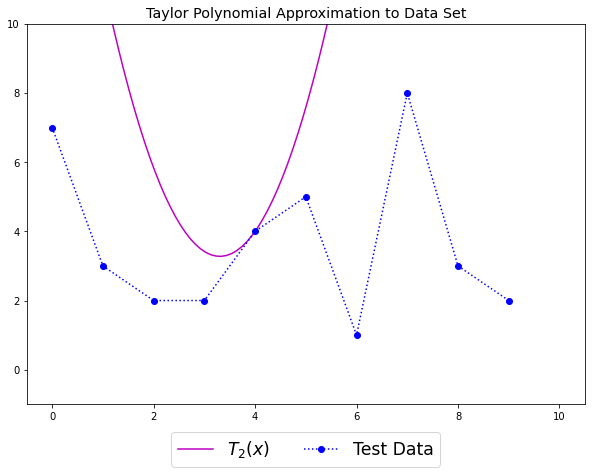

In [247]:
plt.figure(figsize = (10,7))
plt.ylim(-1,10)
plt.plot(v, y, label = r'$T_2(x)$', color = 'm')
plt.plot(indep_var, poly, 'b', marker = 'o', label = 'Test Data', linestyle = ":")
plt.title('Taylor Polynomial Approximation to Data Set', fontsize = 'x-large')
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 5,fontsize = 'xx-large')

In [249]:
taylor_poly = poly[center] + dydx[center] * (x - center) + (second_order_dydx[center] * (x - center)**2 / 2)
# print("$$T_2(", x, ') = ',taylor_poly,' .$$')
# print("$$T_2(x) = ", poly[center], '+', dydx[center], '* ( x -', center, ') +', '(1/2)', '*', second_order_dydx[center], '* ( x -', center,')^2 .$$')

Tangent lines are first order Taylor Polynomials. So, since we evaluated the second order derivatives, we can construct a second order Taylor Polynomial for a neighborhood of values. This is particularly useful when trying to extrapolate incremental values! 

When Constructing the Taylor Polynomial $$T_2(x) = f(a) + f'(a) * (x-a) + (1/2) * f''(a) *  (x-a)^2 .$$

Thus, for this example $$T_2(x) =  4 + 2.083 * ( x - 4 ) + (1/2) * 3.0 * ( x - 4 )^2 .$$
$$T_2( 3.86 ) =  3.74  .$$

# Conclusion

It is important to note that this method of extrapolation only works within a specific interval $(r-a)<x<(r+a)$ or $(r-a)\le x \le(r+a) .$ Where $x$ is the value of interest, $r$ is the radius of convergence, and $a$ is the center. Also, in order to determine the approximation error, Taylor's Remainder Theorem must be addressed prior to determining the validity of the values produced by the constructed Taylor Polynomial.

At this point in time, establishing the proper radius of convergence is out of my scope. However, I have a few theories that may lead to a numerical method of establishing bounds. One speculation is exploring the power series properties of solving differential equations. Specifically, the relation between singular points and center points. Another, and perhaps more accurate, is exploring the Cauchy-Hadamard Theorem. This theorem is found in complex analysis, and it may have a relation to finding the roots of the complex function $f(x) = \frac{1}{x} .$ If the radius of convergence of real values is $$ \lvert x - a \rvert < R ,$$ then it is possible that the complex roots $$f(x) = \frac{1}{x} = 0 = \frac{1}{R} .$$ Since the complex roots are 0 at some values for $f ,$ then the real values will establish the end points of the interval by singularity. Consequently, this result could imply the radius of convergence for the Real Taylor Polynomial. 

For the method of locating the complex zeros, I suspect that it is possible to modify Newton's Method or the Secant Method to approximate the complex zeros. However, there may be better methods to accomplish this. 